In [1]:
from helper import (load_data, token,time_me,
                    show_diagram, show_most_informative_features)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight') # plt.style.available

In [3]:
from sklearn.externals import joblib
from sklearn.model_selection import (train_test_split, KFold,
                                     cross_val_score)
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer, TfidfVectorizer)

#### TfidfVectorizer == CountVectorizer + TfidfTransformer

In [4]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegressionCV

In [5]:
stops = joblib.load('../stops.pkl')

Loading data ...
Droping 10 rows with features lenght of less than 2
Droping 3 as rating and setting 1-2 as negative(0), 4-5 as positive(1))
{1: 460527, 0: 127232} 

Down sampling positive ratings to match negatives
Data loading completed
{1: 127232, 0: 127232} 

Execution Time: 5 seconds


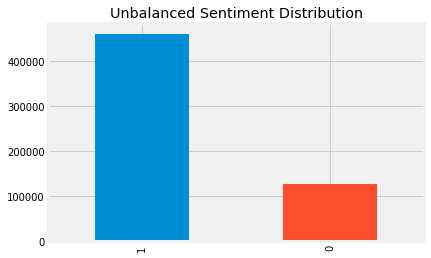

In [6]:
df = load_data('../sentiment_data', balanced=True)

In [7]:
df.head()

,features,target,y
0,Internetkøb med postleverance på under 24 time...,5,1
1,Let og hurtig behandling af erstatning. \r\nMe...,5,1
2,Venlig og hurtig betjening,5,1
3,Super hurtig og effektiv forsendelse lige til ...,5,1
4,"Nemt at bestille, hurtig levering og varen er ...",5,1


In [8]:
 X_train, X_test, y_train, y_test = train_test_split(df['features'], df['y'],
                                                    test_size=.2, random_state=7,stratify=df['y'])

In [9]:
print(f'Traing Size: {X_train.shape[0]}\nTest Size: {X_test.shape[0]:>8}')

Traing Size: 203571
Test Size:    50893


In [10]:
print(f'Traing Size\n\tPositive||Negative Sample\n\t  {y_train[y_train==1].shape[0]}||{y_train[y_train==0].shape[0]}')

Traing Size
	Positive||Negative Sample
	  101785||101786


In [11]:
print(f'Test Size\n\tPositive||Negative Sample\n\t  {y_test[y_test==1].shape[0]}||{y_test[y_test==0].shape[0]}')

Test Size
	Positive||Negative Sample
	  25447||25446


In [12]:
lr_clf  = Pipeline((
        ('vec',  CountVectorizer(ngram_range=(1, 2), max_features=100000,
                                 tokenizer=token, stop_words=stops)),
        ('fe_se', SelectKBest(chi2, k=5000)),
        ('tfidf', TfidfTransformer(sublinear_tf=True)),
        ('clf', LogisticRegressionCV(cv=5,solver='saga',scoring='accuracy', n_jobs=-1, verbose=1))
    ))

In [13]:
lr_clf.fit(X_train, y_train)

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...

C:\Users\danpra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 388 seconds
max_iter reached after 397 seconds
max_iter reached after 389 seconds
max_iter reached after 403 seconds
max_iter reached after 404 seconds
max_iter reached after 406 seconds
max_iter reached after 412 seconds
max_iter reached after 435 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
resca

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 35.7min finished


Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words={'levering...=None,
           refit=True, scoring='accuracy', solver='saga', tol=0.0001,
           verbose=1))])

### c.40 minutes later

In [14]:
%%time
lr_clf.score(X_test, y_test)

Wall time: 17 s


0.9388913996030889

Classification Report
	 _____________________________________________
             precision    recall  f1-score   support

   Negative       0.93      0.95      0.94     25446
   Positive       0.95      0.93      0.94     25447

avg / total       0.94      0.94      0.94     50893

	 _____________________________________________ 




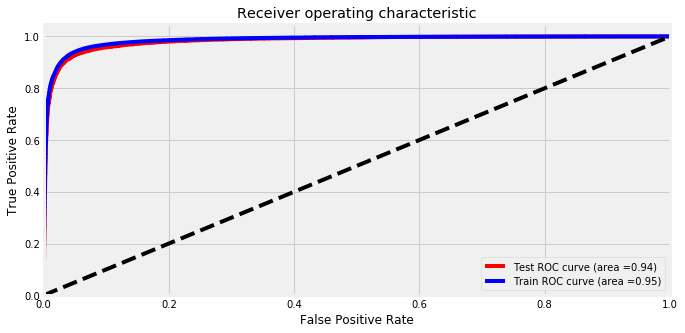

Execution Time: 4 minutes and 30 seconds


In [15]:
show_diagram(lr_clf, X_train, y_train, X_test, y_test, compare_test=True)

In [16]:
feature_names = lr_clf.steps[0][1].get_feature_names()

In [17]:
best_features = [feature_names[i] for i in lr_clf.steps[1][1].get_support(indices=True)]

In [18]:
show_most_informative_features(best_features, lr_clf.steps[3][1], n=100)

	-8.2879	dår            		8.3987	hurt           
	-8.1784	ikk ord        		8.2177	:)             
	-7.9560	ing pak        		7.7987	perfek         
	-7.7808	elend          		7.4603	nemt           
	-7.6390	uacceptabelt   		7.4600	dej            
	-7.1271	km             		7.1691	god            
	-6.7812	ikk tilfred    		7.1178	sup            
	-6.1478	ikk            		6.4870	enest minus    
	-5.9404	hjem hel       		6.3328	fremrag        
	-5.7730	gls            		6.0447	tilfred        
	-5.7532	uacceptabel    		5.7266	fantastisk     
	-5.6404	dår servic     		5.5817	ing problem    
	-5.5959	smadr          		5.2918	sæt fing       
	-5.5947	:(             		5.0172	smertefrit     
	-5.5827	øv             		4.9365	fin            
	-5.5709	værst          		4.8481	behag          
	-5.5676	grin           		4.7183	int klag       
	-5.5662	omm            		4.6975	mang tak       
	-5.4950	ikk iord       		4.5664	smil           
	-5.4837	und kritik     		4.4660	lynhurt        
	-5.4703	urim       